Importing required libraries

In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
Checking the datatypes of features

In [27]:

df=pd.read_excel("quantifi_ad_ranking_data.xlsx")
df.dtypes

company_id                                            int64
goal_detail                                          object
ad_id                                                 int64
goal                                                 object
experiment_id                                         int64
budget                                              float64
body                                                 object
headline                                             object
call_to_action                                       object
mime_type                                            object
age_min                                               int64
age_max                                               int64
genders                                              object
zips                                                  int64
states                                               object
countries                                            object
languages                               

In [28]:
df.isnull().sum().sum()

7

Setting the Seaborn style for plotting

In [29]:
sns.set()

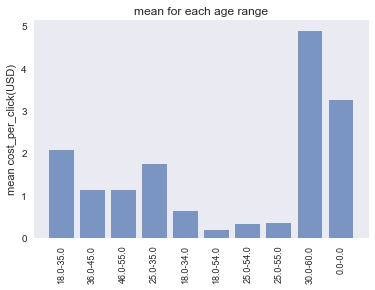

In [32]:
bar_labels=df["age_range"].unique()
x_pos = list(range(len(bar_labels)))
y=[]
for i in bar_labels:
    k =df.ix[:,"age_range"] == i
    y.append(df.ix[k,"cost_per_click"].mean())


plt.bar(x_pos,y,alpha=0.7)
plt.grid()
plt.ylabel("mean cost_per_click(USD)")
#plt.xlabel(bar_labels)
plt.title("mean for each age range")
plt.xticks(x_pos, bar_labels,rotation='vertical')
plt.rc('xtick', labelsize=9)
plt.show()

As we can see that Cost per Click differs for different age groups we include this feature for our model building

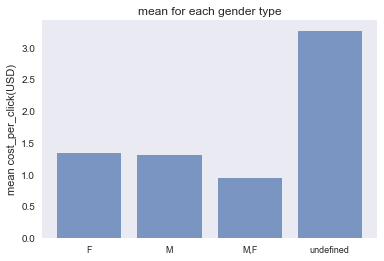

In [33]:
bar_labels1=df["genders"].unique()
x_pos1 = list(range(len(bar_labels1)))
y1=[]
for i in bar_labels1:
    k1 =df.ix[:,"genders"] == i
    y1.append(df.ix[k1,"cost_per_click"].mean())


plt.bar(x_pos1,y1,alpha=0.7)
plt.grid()
plt.ylabel("mean cost_per_click(USD)")
#plt.xlabel(bar_labels)
plt.title("mean for each gender type")
plt.xticks(x_pos1, bar_labels1)
plt.rc('xtick', labelsize=9)
plt.show()

As we can see that Cost per Click differs for different genders we include this feature for our model building. Also, many of the missing data has been replaced by "undefined" here.

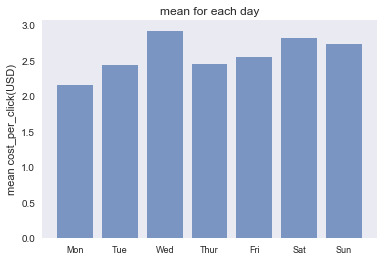

In [34]:
bar_labels2a=df["day_of_week"].unique()
bar_labels2=[str(i) for i in bar_labels2a]
x_pos2 = list(range(len(bar_labels2)))
y2=[]
for i in bar_labels2a:
    k2 =df.ix[:,"day_of_week"] == i
    y2.append(df.ix[k2,"cost_per_click"].mean())


plt.bar(x_pos2,y2,alpha=0.7)
plt.grid()
plt.ylabel("mean cost_per_click(USD)")
#plt.xlabel(bar_labels)
plt.title("mean for each day")
plt.xticks(x_pos2, ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.rc('xtick', labelsize=7)
plt.show()

As we can see that Cost per Click differs for different days of week we include this feature for our model building

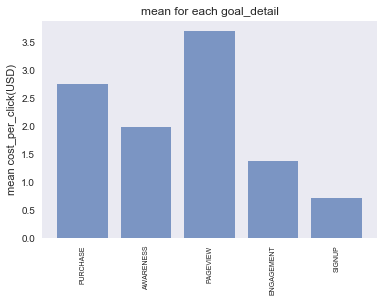

In [35]:
bar_labels3=df["goal_detail"].unique()
x_pos3 = list(range(len(bar_labels3)))
y3=[]
for i in bar_labels3:
    k3 =df.ix[:,"goal_detail"] == i
    y3.append(df.ix[k3,"cost_per_click"].mean())


plt.bar(x_pos3,y3,alpha=0.7)
plt.grid()
plt.ylabel("mean cost_per_click(USD)")
#plt.xlabel(bar_labels)
plt.title("mean for each goal_detail")
plt.xticks(x_pos3, bar_labels3,rotation='vertical')
plt.rc('xtick', labelsize=9)
plt.show()

As we can see that Cost per Click differs for different goal_detail we include this feature for our model building

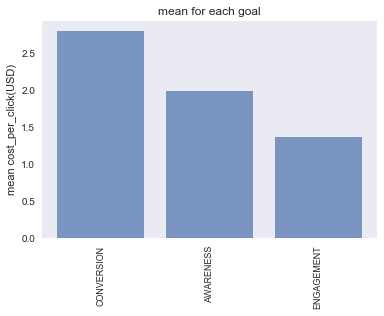

In [36]:
bar_labels4=df["goal"].unique()
x_pos4 = list(range(len(bar_labels4)))
y4=[]
for i in bar_labels4:
    k4 =df.ix[:,"goal"] == i
    y4.append(df.ix[k4,"cost_per_click"].mean())


plt.bar(x_pos4,y4,alpha=0.7)
plt.grid()
plt.ylabel("mean cost_per_click(USD)")
#plt.xlabel(bar_labels)
plt.title("mean for each goal")
plt.xticks(x_pos4, bar_labels4,rotation='vertical')
plt.rc('xtick', labelsize=9)
plt.show()

As we can see that Cost per Click differs for different goal we include this feature for our model building

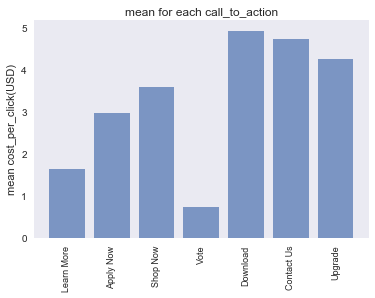

In [37]:
bar_labels5=df["call_to_action"].unique()
x_pos5 = list(range(len(bar_labels5)))
y5=[]
for i in bar_labels5:
    k5 =df.ix[:,"call_to_action"] == i
    y5.append(df.ix[k5,"cost_per_click"].mean())


plt.bar(x_pos5,y5,alpha=0.7)
plt.grid()
plt.ylabel("mean cost_per_click(USD)")
#plt.xlabel(bar_labels)
plt.title("mean for each call_to_action")
plt.xticks(x_pos5, bar_labels5,rotation='vertical')
plt.rc('xtick', labelsize=9)
plt.show()

As we can see that Cost per Click differs for different call_to_action we include this feature for our model building

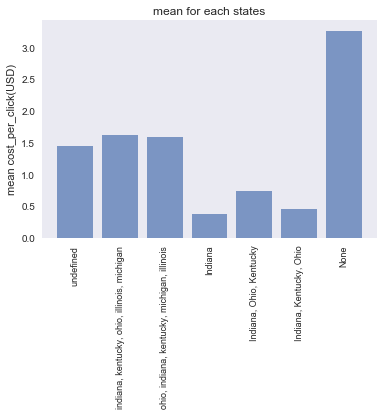

In [38]:
bar_labels6=df["states"].unique()
x_pos6 = list(range(len(bar_labels6)))
y6=[]
for i in bar_labels6:
    k6 =df.ix[:,"states"] == i
    y6.append(df.ix[k6,"cost_per_click"].mean())


plt.bar(x_pos6,y6,alpha=0.7)
plt.grid()
plt.ylabel("mean cost_per_click(USD)")
#plt.xlabel(bar_labels)
plt.title("mean for each states")
plt.xticks(x_pos6, bar_labels6,rotation='vertical')
plt.rc('xtick', labelsize=9)
plt.show()

As we can see that Cost per Click differs for different states we include this feature for our model building

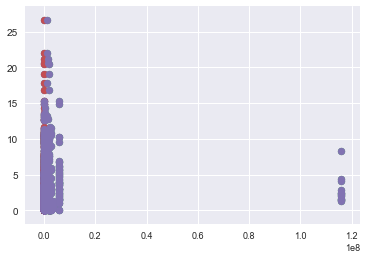

In [40]:
# finding relation b/w approximate_count and cost_per_click
df1=df.ix[:,"approximate_count"]
df2=np.log(df1.replace(to_replace=0, value=10))#taking care of zeros
plt.scatter(df2,df.ix[:,"cost_per_click"])#log values
plt.scatter(df1,df.ix[:,"cost_per_click"])#normal values
plt.show()



In [41]:
df3=df.ix[:,["approximate_count","cost_per_click"]]
df3.corr()#No correlation b/w these variables

,approximate_count,cost_per_click
approximate_count,1.000000,0.020237
cost_per_click,0.020237,1.000000


As linear correlation is very less but there may be associated in some way so took this as a feature

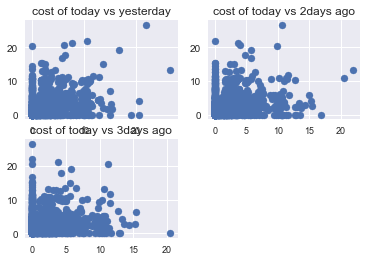

In [42]:
df4=df.ix[:,["prev_1_cost_per_click","prev_2_cost_per_click","prev_3_cost_per_click","cost_per_click"]]
df4.corr()

plt.figure(1)

plt.subplot(221)
plt.scatter(df4["prev_1_cost_per_click"],df4["cost_per_click"])
plt.title('cost of today vs yesterday')
plt.grid(True)


plt.subplot(222)
plt.scatter(df4["prev_2_cost_per_click"],df4["cost_per_click"])
plt.title('cost of today vs 2days ago')
plt.grid(True)


plt.subplot(223)
plt.scatter(df4["prev_3_cost_per_click"],df4["cost_per_click"])
plt.title('cost of today vs 3days ago')
plt.grid(True)

plt.show()

In [43]:
# finding relation b/w previous_spend and cost_per_click
df5=df.ix[:,["prev_1_spend","prev_2_spend","prev_3_spend","cost_per_click"]]
df5.corr()

,prev_1_spend,prev_2_spend,prev_3_spend,cost_per_click
prev_1_spend,1.000000,0.319523,0.175117,0.073436
prev_2_spend,0.319523,1.000000,0.724232,0.208723
prev_3_spend,0.175117,0.724232,1.000000,0.127701
cost_per_click,0.073436,0.208723,0.127701,1.000000


Took these features for building a model

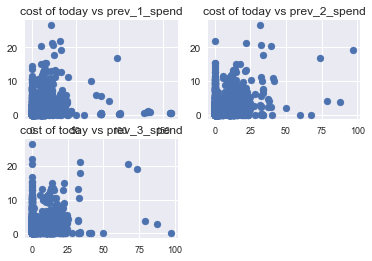

In [44]:
plt.figure(1)

plt.subplot(221)
plt.scatter(df5["prev_1_spend"],df5["cost_per_click"])
plt.title('cost of today vs prev_1_spend')
plt.grid(True)


plt.subplot(222)
plt.scatter(df5["prev_2_spend"],df5["cost_per_click"])
plt.title('cost of today vs prev_2_spend')
plt.grid(True)


plt.subplot(223)
plt.scatter(df5["prev_3_spend"],df5["cost_per_click"])
plt.title('cost of today vs prev_3_spend')
plt.grid(True)

plt.show()

In [45]:
df6=df.ix[:,["prev_1_clicks","prev_2_clicks","prev_3_clicks","cost_per_click"]]
df6.corr()

,prev_1_clicks,prev_2_clicks,prev_3_clicks,cost_per_click
prev_1_clicks,1.000000,0.434277,0.282893,-0.172316
prev_2_clicks,0.434277,1.000000,0.758529,-0.142003
prev_3_clicks,0.282893,0.758529,1.000000,-0.117098
cost_per_click,-0.172316,-0.142003,-0.117098,1.000000


Took these features for building a model

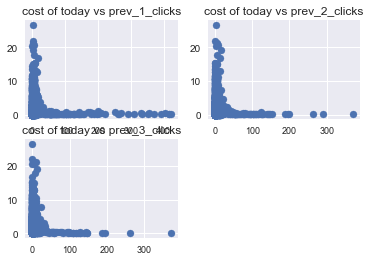

In [46]:

plt.figure(1)

plt.subplot(221)
plt.scatter(df6["prev_1_clicks"],df6["cost_per_click"])
plt.title('cost of today vs prev_1_clicks')
plt.grid(True)


plt.subplot(222)
plt.scatter(df6["prev_2_clicks"],df6["cost_per_click"])
plt.title('cost of today vs prev_2_clicks')
plt.grid(True)


plt.subplot(223)
plt.scatter(df6["prev_3_clicks"],df6["cost_per_click"])
plt.title('cost of today vs prev_3_clicks')
plt.grid(True)

plt.show()

In [47]:
df7=df.ix[:,["cost_per_impression","cost_per_reach","cost_per_action","cost_per_click"]]
df7.corr()

,cost_per_impression,cost_per_reach,cost_per_action,cost_per_click
cost_per_impression,1.000000,0.985741,0.285442,0.365902
cost_per_reach,0.985741,1.000000,0.307857,0.392524
cost_per_action,0.285442,0.307857,1.000000,0.550434
cost_per_click,0.365902,0.392524,0.550434,1.000000


Just checked the correlation b/w different Y variables although these are not included in our features

In [48]:
#headline of ad does not have any correlation with cost per click
df8=df.ix[:,28:36]  
df8["cost_per_click"] = df.ix[:,"cost_per_click"]
df8.corr()

,character_count_body,character_count_headline,punc_body_newline_ratio,punc_body_!_ratio,punc_body_#_ratio,punc_headline_newline_ratio,punc_headline_!_ratio,punc_headline_#_ratio,cost_per_click
character_count_body,1.000000,0.298017,-0.184655,0.054143,0.023480,NaN,-0.009489,-0.034735,-0.152545
character_count_headline,0.298017,1.000000,-0.064581,-0.133390,-0.201954,NaN,0.010191,-0.221205,0.045437
punc_body_newline_ratio,-0.184655,-0.064581,1.000000,-0.225373,-0.113639,NaN,0.080237,-0.040555,0.132244
punc_body_!_ratio,0.054143,-0.133390,-0.225373,1.000000,0.263312,NaN,0.198982,-0.046826,0.067749
punc_body_#_ratio,0.023480,-0.201954,-0.113639,0.263312,1.000000,NaN,-0.015822,0.426127,0.044939
punc_headline_newline_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
punc_headline_!_ratio,-0.009489,0.010191,0.080237,0.198982,-0.015822,NaN,1.000000,-0.035731,-0.009836
punc_headline_#_ratio,-0.034735,-0.221205,-0.040555,-0.046826,0.426127,NaN,-0.035731,1.000000,0.028454
cost_per_click,-0.152545,0.045437,0.132244,0.067749,0.044939,NaN,-0.009836,0.028454,1.000000


In [49]:
#AWS hotvector correlation(set of 359 attributes)
df9=df.ix[:,57:]  
df9["cost_per_click"] = df.ix[:,"cost_per_click"]
df10=df9.corr()


In [53]:
df10.iloc[:,-1]

interest - 3. $75,000 - $99,999          -0.062381
interest - 4. $100,000 - $124,999        -0.062381
interest - 5. $125,000 - $149,999        -0.062381
interest - 6. $150,000 - $249,999        -0.062381
interest - Auto Racing                   -0.157872
interest - Brad Keselowski               -0.097953
interest - Chief Marketing Officer       -0.062381
interest - Costco                         0.053741
interest - DNCE                          -0.114219
interest - Dale Earnhardt Jr.            -0.141758
interest - Danica Patrick                -0.097953
interest - Director of Sales Marketing   -0.062381
interest - Discount stores                0.053741
interest - Homeowner association          0.053741
interest - Homeowners                     0.053741
interest - Indianapolis 500              -0.097953
interest - Indianapolis Motor Speedway   -0.197547
interest - Jeff Gordon                   -0.097953
interest - Jimmie Johnson                -0.097953
interest - Kyle Busch          

In [54]:
r1=np.abs(df10["cost_per_click"]) > 0.15# main attributes
df11= df10.ix[r1,"cost_per_click"]# A total of 10 attributes

In [55]:
df11

interest - Auto Racing                   -0.157872
interest - Indianapolis Motor Speedway   -0.197547
interest - NASCAR                        -0.157872
interest - Nascar Racing                 -0.157872
aws_label_classroom                      -0.153883
aws_label_computer                       -0.158590
aws_label_electronics                    -0.158590
aws_label_lcd_screen                     -0.176960
aws_label_laptop                         -0.176960
aws_label_pc                             -0.176960
cost_per_click                            1.000000
Name: cost_per_click, dtype: float64

As per the above reasonings I have taken only 45 features from the given file and saved it as "input.xlsx" file